In [1]:
import pylcp
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants as const

In [2]:
gamma = 2*np.pi*100_000_000 #Hz
k = 2*np.pi/229e-9 # m^-1
t_unit = 1/gamma
m_unit = 1/k
velocity_unit = m_unit/t_unit
accel_unit = m_unit/t_unit**2
Hz_unit = 1/t_unit
Js_unit = const.hbar # kg m^2/s
mass_unit = Js_unit*t_unit/m_unit**2
HzperT_unit = const.value("Bohr magneton in Hz/T")
T_unit = Hz_unit/HzperT_unit
amu_unit = mass_unit/1.66e-27
cm_unit = m_unit/1e-2
F_unit = mass_unit*m_unit/t_unit**2

In [3]:
k/2/np.pi

4366812.227074236

In [4]:
Hg, Bgq = pylcp.hamiltonians.singleF(F=0, gF=0, muB=1,)
He, Beq = pylcp.hamiltonians.singleF(F=1, gF=1, muB=1)
dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(0, 1)
ham = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq, mass=112/amu_unit,k=k*m_unit, gamma = gamma/Hz_unit)
mag_field = pylcp.fields.quadrupoleMagneticField(0.05*cm_unit*const.value("Bohr magneton in Hz/T")/Hz_unit)

In [403]:
def MOT_and_Slow_Beams(det_MOT, det_slower, *args):
    return pylcp.laserBeams([
        {'kvec':np.array([-1/np.sqrt(2), -1/np.sqrt(2), 0.]), 'pol':-1, 'delta':det_MOT, 's':0.3,'wb':1/cm_unit},
        {'kvec':np.array([1/np.sqrt(2), 1/np.sqrt(2), 0.]), 'pol':-1, 'delta':det_MOT, 's':0.3,'wb':1/cm_unit},
        {'kvec':np.array([1/np.sqrt(2), -1/np.sqrt(2), 0.]), 'pol':-1, 'delta':det_MOT, 's':0.3,'wb':1/cm_unit},
        {'kvec':np.array([-1/np.sqrt(2), 1/np.sqrt(2), 0.]), 'pol':-1, 'delta':det_MOT, 's':0.3,'wb':1/cm_unit},
        {'kvec':np.array([0., 0.,  1.]), 'pol':+1, 'delta':det_MOT, 's':0.3,'wb':1/cm_unit},
        {'kvec':np.array([0., 0., -1.]), 'pol':+1, 'delta':det_MOT, 's':0.3,'wb':1/cm_unit},
        {'kvec':np.array([-1, 0., 0.]), 'pol':-1, 'delta':det_slower, 's':0.3,'wb':1/cm_unit}
    ], beam_type=pylcp.gaussianBeam)

In [ ]:
magField

Completed in 6.27 s.                                               
Completed in 2.61 s.                                               


(-300.0, 300.0)

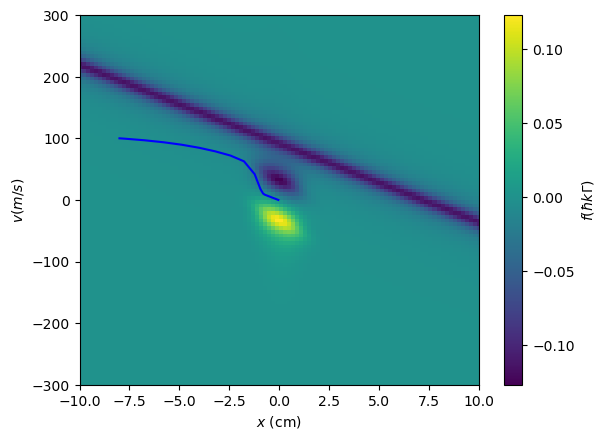

In [404]:
rateeq = pylcp.rateeq(MOT_and_Slow_Beams(-1,-4), mag_field, ham,include_mag_forces=False)

r = np.linspace(-10/cm_unit, 10/cm_unit, 100)
v = np.linspace(-300/velocity_unit, 300/velocity_unit, 100)

R, V = np.meshgrid(r, v)
rateeq.generate_force_profile([R, np.zeros(R.shape), np.zeros(R.shape)],
                           [V, np.zeros(V.shape), np.zeros(V.shape)],
                           name='Frad', progress_bar=True)

angle = float(0)
vel = float(100)

rateeq.set_initial_position_and_velocity(np.array([-8/cm_unit, 0., 0.]),np.array([vel*np.cos(np.radians(angle))/velocity_unit, vel*np.sin(np.radians(angle))/velocity_unit, 0.]))
rateeq.set_initial_pop(np.array([1., 0., 0., 0.]))
rateeq.evolve_motion([0., 5e-2/t_unit], progress_bar=True, max_step = 10e-5/t_unit, rtol=1e-3, atol=[1,1,1,1,1/velocity_unit,1/velocity_unit,1/velocity_unit,1e-3/cm_unit,1e-3/cm_unit,1e-3/cm_unit],method="Radau")
sol = rateeq.sol

fig, ax = plt.subplots(1, 1)
ax.plot(sol.r[0]*cm_unit,sol.v[0]*velocity_unit,'b-')
colormesh = ax.pcolormesh(R*cm_unit, V*velocity_unit, rateeq.profile['Frad'].F[0], cmap = 'viridis')
cb1 = plt.colorbar(colormesh)
cb1.set_label('$f(\hbar k \Gamma)$')
ax.set_xlabel('$x$ (cm)')
ax.set_ylabel('$v(m/s)$')
fig.subplots_adjust(left=0.12,right=0.9)
ax.set_xlim([-10,10])
ax.set_ylim([-300,300])

In [208]:
(0.2/(112/amu_unit))*accel_unit/30000

65.68575627065887

In [138]:
rateeq.set_initial_position_and_velocity(np.array([-8/cm_unit, 0., 0.]),np.array([vel*np.cos(np.radians(angle))/velocity_unit, vel*np.sin(np.radians(angle))/velocity_unit, 0.]))
rateeq.set_initial_pop(np.array([1., 0., 0., 0.]))
rateeq.evolve_motion([0., 5e-2/t_unit], progress_bar=True, max_step = 1e-5/t_unit, rtol=1e-3, atol=[1,1,1,1,1/velocity_unit,1/velocity_unit,1/velocity_unit,1e-3/cm_unit,1e-3/cm_unit,1e-3/cm_unit],method="Radau")
sol = rateeq.sol

Completed in 21.24 s.                                               


        N: array([[ 1.00000000e+00,  9.83417609e-01,  9.74040428e-01, ...,
         9.99997559e-01,  9.99997559e-01,  9.99997560e-01],
       [ 0.00000000e+00,  4.76187721e-29,  7.59611276e-29, ...,
         1.63725299e-06,  1.63659323e-06,  1.63628181e-06],
       [ 0.00000000e+00,  1.62871771e-30,  2.59773475e-30, ...,
        -3.37299831e-19, -3.35019577e-19, -7.69821084e-19],
       [ 0.00000000e+00,  1.65823909e-02,  2.59595723e-02, ...,
        -8.24360031e-17, -8.17469550e-17, -2.71579007e-16]])
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 35046
     njev: 3
      nlu: 10012
        r: array([[-2.21168123e+006, -2.21167712e+006, -2.21163606e+006, ...,
         1.35977694e+008,  1.36005340e+008,  1.36018396e+008],
       [ 0.00000000e+000,  5.82120227e-112, -1.75132947e-107, ...,
        -1.53961510e-071, -1.53992846e-071, -1.54007643e-071],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,

In [76]:
10/velocity_unit

0.44

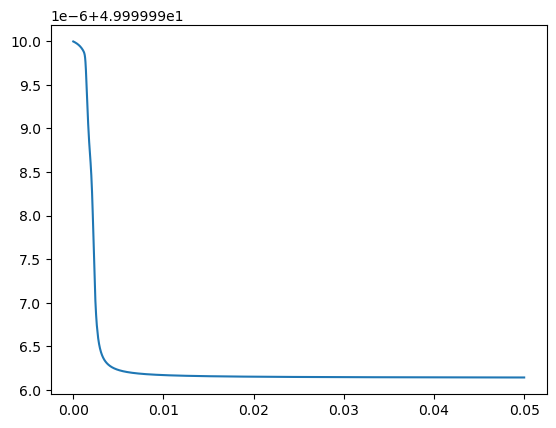

In [183]:
plt.plot(sol.t*t_unit,sol.v[0]*velocity_unit)

In [178]:
1e-2*0.15/0.05

0.03

In [179]:
(sol.r[0][-1]*cm_unit - sol.r[0][0]*cm_unit)/(sol.t[-1]*t_unit - sol.t[0]*t_unit)

9999.999859855407

In [112]:
velocity_unit

22.727272727272727